### Objectives:   
 1) Calculate the average hours per day that all Americans travel.    
 2) Observe the weekly cycles, if any, in reasons for travel.     
 3) Try to discern whether homes are closer to work or school, perhaps giving insight into housing market choices.    


<span style="color:green">
NB that notes in green are "magic carpet moments", where, in draft #1,   
I fly over the gaps/omissions/holes, for the sake of getting to the end of the first draft,   
in the blind faith that, in draft #2 +, I will fix them. text
</span>


### Data Source:   
Data from the Bureau of Labor Statistics' ATUS - the American Time-Use Survey.    
ATUS is itself is a sub-sampling of respondents previously surveyed in the Current Population Survey (CPS),   
a monthly survey to maintain knowledge of labor statistics.
https://www.kaggle.com/bls/american-time-use-survey

ATUS provides 9 linkable datasets. (more on that later)   
The full datasets, especially when merged need 4Gb of memory, so can cripple my laptop.  
Thus I choose to prototype my code with pruned down versions of each csv file.    
(That and other supporting code in separate python scripts) 

I will start with one which is itself a summary some of the others: "atussum.csv"   
It being *totals* of activity times, it is wider than the other cvs's (455 columns) but not so deep.   

<span style="color:green">NB that notes in green are "magic carpet moments", where, in draft #1,    
I fly over the gaps/omissions/holes, for the sake of getting to the end of the first draft,  
in the blind faith that, in draft #2+, I will fix them. </span>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#sum_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/atussum.csv'
sum_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/pruned_copies/pruned_atussum.csv'
df_sum = pd.read_csv(sum_fp)
full_width_shape = df_sum.shape 

In [4]:
# The vast majority of columns and coded activities, for now, I shall discard:
# Keeping the first 24 columns that interest me and all columns related to travel.
first_24 = list(df_sum.columns.values)[:24]
travel_18s = list(df_sum.filter(regex='t18', axis=1))
first24_and_travel = first_24 + travel_18s
df_sum = df_sum.filter(items=first24_and_travel)
lean_travel_shape = df_sum.shape

print("\nPruned db width from: {0} ... down to: {1}".format(full_width_shape, lean_travel_shape))
print("\nSo in the summary data, we have {0} recorded reasons for travel.".format(len(travel_18s)))


Pruned db width from: (54, 455) ... down to: (54, 77)

So in the summary data, we have 53 recorded reasons for travel.


### Recall Objective 1:
1) Calculate the average hours per day that all Americans travel.       

Before diving into different, specific reasons for travel, let's sum all travel columns,  
whatever they represent and make a new column "all_travel" to hold that sum.

In [5]:
# Summing across columns ( hence: axis = 1) all those named in the list: travel_18s
df_sum['all_travel'] = df_sum[travel_18s].sum(axis=1)

# The average time spent traveling by Americans:
all_travelling_any_reason = df_sum['all_travel'].sum()
all_travellers = df_sum['all_travel'].count()
mean_travel_any_reason = round(all_travelling_any_reason / all_travellers)
in_hours = mean_travel_any_reason/60
print("\nAverage time Americans spend traveling = {0:.0f} mins".format(mean_travel_any_reason))
print("(ie {0:.2f} hours ... Travelling for any reason.)\n".format(in_hours))


Average time Americans spend traveling = 64 mins
(ie 1.07 hours ... Travelling for any reason.)



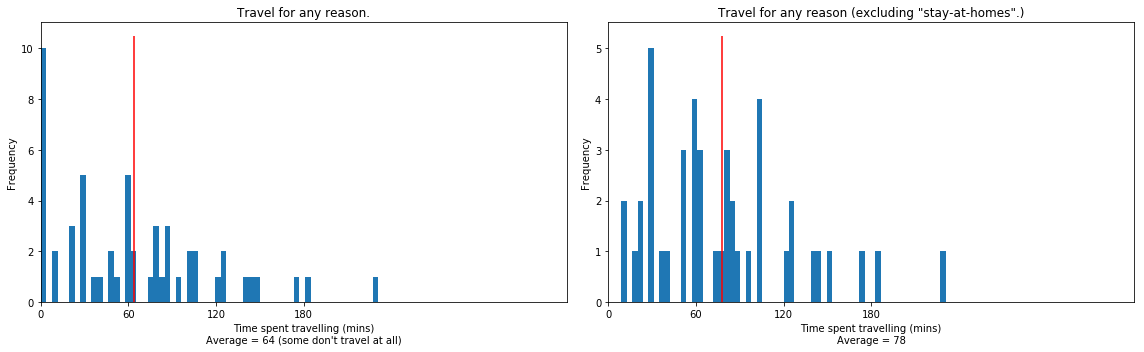

That long tail presumably includes those that "travel" for a living; taxi, truck, bus drivers etc
I should like to circle back, and remove those professionals, but, for now, must press on.


In [6]:
# Let's plot that new "all_travel" column.
travel_mean = df_sum['all_travel'].mean()
some_travel_mean = df_sum['all_travel'].where(df_sum['all_travel'] > 0).mean()
exclude_stay_at_homes = df_sum['all_travel'].where(df_sum['all_travel'] > 0)

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(1, 2, 1)            # Create first  matplotlib axes
df_sum['all_travel'].plot(kind='hist',  ax = ax1, bins=60)
plt.title('Travel for any reason.')    
plt.xlabel("Time spent travelling (mins)\nAverage = {0:.0f} (some don't travel at all)".format(travel_mean))
plt.ylabel('Frequency')
plt.xlim([0, 360])
ymin, ymax = plt.ylim()
plt.xticks(range(0, 240, 60))
plt.vlines(travel_mean, 0, ymax, color='red')

ax2 = fig.add_subplot(1, 2, 2)            # Create second matplotlib axes
exclude_stay_at_homes.plot(kind='hist', ax = ax2, bins=60)                   
plt.title('Travel for any reason (excluding "stay-at-homes".)')    
plt.xlabel('Time spent travelling (mins)\nAverage = {0:.0f}'.format(some_travel_mean))
plt.ylabel('Frequency')
plt.xlim([0, 360])
ymin, ymax = plt.ylim()
plt.xticks(range(0, 240, 60))
plt.vlines(some_travel_mean, 0, ymax, color='red')
plt.tight_layout()
plt.show()

print('That long tail presumably includes those that "travel" for a living; taxi, truck, bus drivers etc')
print("I should like to circle back, and remove those professionals, but, for now, must press on.")
#TRDTOCC1 is respondent's occupation   22 is code for "Transportation and material moving occupations"
# In summary, tryhhchild is whether household has kid under 18.

### How does travel, all_travel,  vary through the week?
Using groupby to examine how weekly patterns show in the data.

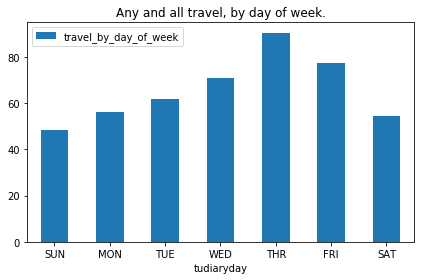

In [7]:
days_of_week = pd.Series(['SUN', 'MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT'])
day_names = {0:'Sun', 1:'Mon',2:'Tues',3:'Weds',4:'Thurs',5:'Fri',6:'Sat'}
day_names_caps = ['SUN', 'MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT']

# The output of a groupby is a series....
se_travel = df_sum.filter(items=['all_travel', 'tudiaryday']).groupby('tudiaryday')['all_travel'].mean()

#    WHY DID THESE MORE PYTHONESQUE WAYS FAIL? (merely trying to label bars with "Mon", "Tue" etc)
#df_travel['day_of_week'] = df_travel['tudiaryday'].apply(lambda x: day_names[x])
#df_travel['day_of_week'] = df_travel.apply(lambda x: day_names[x])
#df_travel['Col3'] = df_travel['index'].map(lambda x: day_names[x])

df_travel_reindexed = se_travel.reindex(['SUN', 'MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT']).to_frame()
df_travel_reindexed['travel_by_day_of_week'] = list(se_travel)
df_travel_reindexed.plot(kind='bar', y='travel_by_day_of_week', title="Any and all travel, by day of week.", rot = 0)
plt.tight_layout()
plt.show()

I confess I'm surprised by how even this plot turns out to be.   
I assumed a strong weekly signal would be apparent, even in this data aggregated into "all_travel".     
More motivation of dive into details...

In [8]:
# Here is a function to provide the description of specific reasons for travel.
# All activity codes, including travel related activities are in atuscodes.csv
codes_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/codes.csv'
df_codes = pd.read_csv(codes_fp)

def get_code_meaning(in_df=None, code=None):
    try:
        df_matches_with_nans = in_df.where(in_df['code'] == code)
        df_matches_no_nans = df_matches_with_nans.dropna(how='any')
        if len(df_matches_no_nans):
            meaning = df_matches_no_nans.iloc[0]['name']
            return meaning
        else:
            return None
    except IOError as e:
        print("get_code_meaning I/O error({0}): {1}".format(e.errno, e.strerror))

print("\nProvide meaning to {0} codes listed in travel_18s\n".format(len(travel_18s)))
for tcode in travel_18s:
    code = int(tcode[1:])
    meaning = get_code_meaning(in_df=df_codes, code=code)
    print("{0:9} -> {1}".format(tcode, meaning))


Provide meaning to 53 codes listed in travel_18s

t180101   -> Travel related to personal care
t180199   -> Travel related to personal care, n.e.c.*
t180280   -> Travel related to household activities
t180381   -> Travel related to caring for and helping hh children
t180382   -> Travel related to caring for and helping hh adults
t180399   -> Travel rel. to caring for & helping hh members, n.e.c.*
t180481   -> Travel related to caring for and helping nonhh children
t180482   -> Travel related to caring for and helping nonhh adults
t180499   -> Travel rel. to caring for & helping nonhh members, n.e.c.*
t180501   -> Travel related to working
t180502   -> Travel related to work-related activities
t180589   -> Travel related to work, n.e.c.*
t180601   -> Travel related to taking class
t180682   -> None
t180699   -> Travel related to education, n.e.c.*
t180701   -> Travel related to grocery shopping
t180782   -> Travel related to shopping (except grocery shopping)
t180801   -> Travel relate

### Ok, so now we have an easy means to meaning, lets pick a few specific reasons for trips...

#### Choose two expected to have weekdays/weekend relevence:       
    1)t181302   -> Travel related to attending sporting/recreational events   
    2)t181401   -> Travel related to religious/spiritual practices   

####  choose another expected to have time-of-day patterns:   
    1)t181101   -> Travel related to eating and drinking   

####  Choose another expected to have non-earning partner, perhaps gender correlates
    1)t180381   -> Travel related to caring for and helping hh children  

Anticipating a similar "plot-per-week" for each of the above 4 travel codes,   
below is the function to do so, easily.

<span style="color:green"> DRAFT @2
In a loop of 4 activity codes, plot the per_week charts as sub plots
for easier inter comparison for the reader.  
Near working code/pseudo code in next box.
</span>

###  Objective 3)  Try to discern whether homes are closer to work or school  (perhaps giving insight into housing market choices.)

I'll attack this question twice:  
    1) First, just using the summary (which has codes for both work and education travel, but, for respondent only) 
    2) Second, merging with roster, respondents data, to confirm the household as kids.

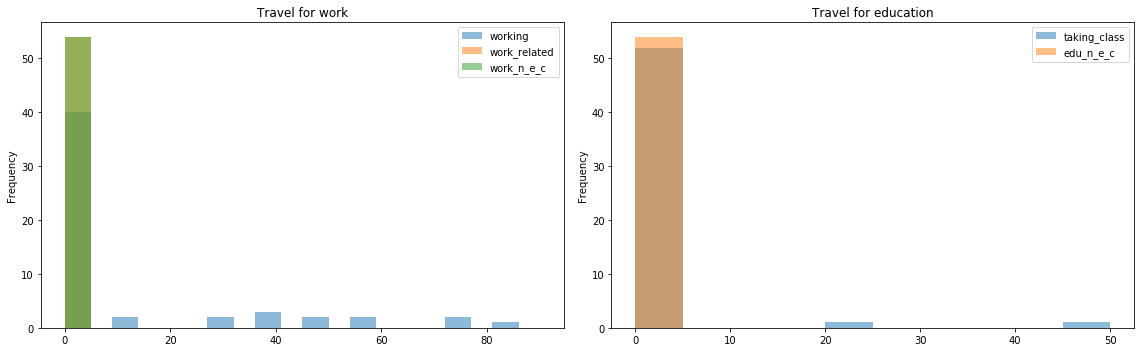

In [9]:
work_travel_codes = ['t180501', 't180502', 't180589']
edu_travel_codes = ['t180601', 't180699']

all_work_travel_df = df_sum[['t180501', 't180502', 't180589']]
all_edu_travel_df  = df_sum[['t180601', 't180699']]

all_work_travel_df = all_work_travel_df.rename(columns={"t180501": "working", 
                                                        't180502': "work_related", 
                                                        't180589': "work_n_e_c"})
all_edu_travel_df = all_edu_travel_df.rename(columns={"t180601": "taking_class", 
                                                      't180699': "edu_n_e_c"})

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(1, 2, 1)      
all_work_travel_df.plot(kind='hist', ax=ax1, width=5, alpha = 0.5)
plt.title('Travel for work') 

ax2 = fig.add_subplot(1, 2, 2)     
all_edu_travel_df.plot(kind='hist' , ax=ax2, width=5, alpha = 0.5)
plt.title('Travel for education') 
plt.tight_layout()
plt.show()

# bars of different columns superimposed. Want side by side.

The above two plot seems more explorative than explanitive.  
Clarity needs simplicity. One "thing" for work Vs another "thing" for education, on common axes.  

<span style="color:green"> 
Draft #2
Aggregate/sum the above multiple codes/columns (still jut summary) and plot on common axes.
Maybe, since the summary retains info on if child under 18 in house, use that to find "the school run".
</span>

In [10]:
# Merging data
#rost_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/atusrost.csv'
#rost_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/pruned_copies/pruned_atusrost.csv'
#df_rost = pd.read_csv(rost_fp)

#resp_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/atusresp.csv'
resp_fp = '/Users/twaddy/NOTES/thinkful/DataSciBootCampPrep/cvs_data/atus/pruned_copies/pruned_atusresp.csv'
df_resp = pd.read_csv(resp_fp)
df_resp.head()

,tucaseid,tulineno,tespuhrs,trdtind1,trdtocc1,trernhly,trernupd,trhernal,trhhchild,trimind1,...,tryhhchild,trwbmodr,trtalone_wk,trtccc_wk,trlvmodr,trtec,tuecytd,tuelder,tuelfreq,tuelnum
0,20030100013280,1,-1,40,8,2200,1,1,2,15,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,20030100013344,1,50,16,16,-1,1,-1,1,5,...,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,20030100013352,1,-1,43,15,1250,0,0,2,16,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,20030100013848,1,40,-1,-1,-1,-1,-1,1,-1,...,9,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,20030100014165,1,-1,42,10,-1,-1,-1,1,16,...,14,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [19]:
# To "explore/get a grip" on columns and what they mean, as I researched the documentation
# I accumulated a dictionary of the column descriptions, so, can use it here...
import atus_var_dictionary as avd
resp_cols = list(df_resp.columns.values)

missing_meanings = []
#for col in resp_cols:
for col in first_24:
    column_description, cvses = avd.get_col_meaning(col_head=col)
    if column_description:
        print("{0:14} ... means... {1}".format(col, column_description))
    else:
        missing_meanings.append(col)

tucaseid       ... means... household case ID
gemetsta       ... means... Metropolitan status... switches to GTMETSTA in 2004
peeduca        ... means... Educational Attainment
pehspnon       ... means... Hispanic origin
ptdtrace       ... means... self-reported race
teage          ... means... respondent's age
telfs          ... means... labor force status
temjot         ... means... Multiple job status
teschenr       ... means... enrolled in high school, college, or university
teschlvl       ... means... would that be high school, college, or university
tesex          ... means... sex
tespempnot     ... means... employment status of spouse or unmarried partner
trchildnum     ... means... number of household children < 18
trdpftpt       ... means... Full time or part time employment status of respondent
trernwa        ... means... Weekly earnings at main job (2 implied decimals)
trholiday      ... means... Flag to indicate if diary day was a holiday
trspftpt       ... means... Full ti

In [10]:
#act_rost_reports = pd.merge(activities_count, r_counts, on=['TESEX', 'TEAGE'], how='outer')
#act_rost_reports['reports_per_resp'] = act_rost_reports.reports / act_rost_reports.resp_count
#act_rost_reports.drop('resp_count', 1, inplace=True)
#act_rost_reports = act_rost_reports.groupby(['TUTIER1CODE', 'TUTIER2CODE', 'TUTIER3CODE', 'TESEX', 'TEAGE']).sum()
#act_rost_reports.head()